$\require{mhchem}$
$\require{physics}$

$\newcommand{\Ce}{\ce{e}}$
$\newcommand{\Car}{\ce{Ar}}$
$\newcommand{\Carp}{\ce{Ar+}}$
$\newcommand{\Carm}{\ce{Ar}^{*}}$
$\newcommand{\Csihp}[1]{\ce{SiH#1}}$
$\newcommand{\Ceps}{\varepsilon}$


$\newcommand{\Ne}{n_{\Ce}}$
$\newcommand{\Nar}{n_{\ce{Ar}}}$
$\newcommand{\Narp}{n_{\ce{Ar+}}}$
$\newcommand{\Narm}{n_{\ce{Ar}^{*}}}$
$\newcommand{\Nsihp}[1]{n_{\ce{SiH#1}}}$
$\newcommand{\Neps}{n_{\varepsilon}}$

$\newcommand{\Kel}{k_{\text{el}}}$
$\newcommand{\Ki}{k_{\text{i}}}$
$\newcommand{\Kex}{k_{\text{ex}}}$
$\newcommand{\Kiarm}{k_{\text{i},\Carm}}$
$\newcommand{\Kelsihf}{k_{\text{el},\Csihp{4}}}$
$\newcommand{\Kdisihf}{k_{\text{di},\Csihp{4}}}$
$\newcommand{\Kdsih}[1]{k_{\text{d},\Csihp{#1}}}$
$\newcommand{\Kisiht}{k_{\text{i},\Csihp{3}}}$
$\newcommand{\Kv}[1]{k_{\text{v#1}}}$
$\newcommand{\Kn}[1]{k_{\text{#1}}}$

$\newcommand{\Eel}{\varepsilon_{\text{el}}}$
$\newcommand{\Ei}{\varepsilon_{\text{i}}}$
$\newcommand{\Eex}{\varepsilon_{\text{ex}}}$
$\newcommand{\Eiarm}{\varepsilon_{\text{i},\Carp}}$
$\newcommand{\Eelsihf}{\varepsilon_{\text{el},\Csihp{4}}}$
$\newcommand{\Edisihf}{\varepsilon_{\text{di},\Csihp{4}}}$
$\newcommand{\Edsih}[1]{\varepsilon_{\text{d},\Csihp{#1}}}$
$\newcommand{\Eisiht}{\varepsilon_{\text{i},\Csihp{3}}}$
$\newcommand{\Ev}[1]{\varepsilon_{\text{v#1}}}$
$\newcommand{\En}[1]{\varepsilon_{\text{#1}}}$
$\newcommand{\dv}[2]{\frac{\text{d}#1}{\text{d}#2}}$

   Copyright 2019 Benjamin Santos

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.


If you find this notebook useful, please cite as: Santos, B., Cacot, L., Boucher, C. & Vidal, F. Electrostatic enhancement factor for the coagulation of silicon nanoparticles in low-temperature plasmas. Plasma Sources Sci. Technol. 28, 045002 (2019).

```@article{santos_electrostatic_2019,
	title = {Electrostatic enhancement factor for the coagulation of silicon nanoparticles in low-temperature plasmas},
	volume = {28},
	issn = {0963-0252},
	url = {https://doi.org/10.1088%2F1361-6595%2Fab0a2b},
	doi = {10.1088/1361-6595/ab0a2b},
	number = {4},
	urldate = {2019-06-01},
	journal = {Plasma Sources Sci. Technol.},
	author = {Santos, Benjamin and Cacot, Laura and Boucher, Claude and Vidal, François},
	month = apr,
	year = {2019},
	pages = {045002},
}```

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.constants as const
from scipy.integrate import solve_ivp

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir('../')

In [4]:
import trazar as tzr
import plazma as pz

# Plasma model

We considered the following reactions,
$$\begin{equation*}
  \begin{array}{llll}
    \text{R1}&\Kel&\text{elastic}& \ce{Ar + e -> Ar + e}\\
    \text{R2}&\Ki&\text{ionization}& \ce{Ar + e -> Ar^+ + 2e}\\
    \text{R3}&\Kex&\text{excitation}& \ce{Ar + e -> Ar}^*\ce{+ e}\\
    \text{R4}&\Kiarm&\text{ionization}& \ce{Ar}^*\ce{ + e -> Ar^+ + 2e}\\
    \text{R5}&\Kelsihf&\text{elastic}& \ce{SiH_4 + e -> SiH_4 + e}\\
    \text{R6}&\Kdisihf&\text{diss. ionization}&\ce{SiH_4 + e -> SiH^+_3 + H + 2e}\\
    \text{R7}&\Kdsih{3}&\text{dissociation}&\ce{SiH_4 + e -> SiH_3 + H + e}\\
    \text{R8}&\Kdsih{2}&\text{dissociation}&\ce{SiH_4 + e -> SiH_2 + 2H + e}\\
    \text{R9}&\Kisiht&\text{ionization}&\ce{SiH_3 + e -> SiH^+_3 + 2e}\\
    \text{R10}&\Kv{13}&\text{vibrational}&\ce{SiH_4 + e -> SiH^{v13}_4 + e}\\
    \text{R11}&\Kv{24}&\text{vibrational}&\ce{SiH_4 + e -> SiH^{v24}_4 + e}\\
    \text{R12}&\Kn{12}&\text{metastable}& \ce{SiH4 + Ar^{\star} -> SiH3 + H + Ar}\\
    \text{R13}&\Kn{13}&\text{metastable}& \ce{SiH4 + Ar^{\star} -> SiH2 + 2H + Ar}\\
    \text{R14}&\Kn{14}&\text{metastable}& \ce{SiH3 + Ar^{\star} -> SiH2 + H + Ar}\\
    \text{R15}&\Kn{15}&\text{metastable}& \ce{SiH2 + Ar^{\star} -> SiH + H + Ar}
  \end{array}
\end{equation*}$$
with coefficient rates,

In [5]:
rates_dict = dict()

In [6]:
rates_dict["R1:kel"] = ("a1expb", 1.8560282921521678e-13, 0.1633129254054345, 0.0)
rates_dict["R2:ki"] = ("arrhenius", 7.41485579e-14, 15.8, 5.00954185e-3)
rates_dict["R3:kex"] = ("arrhenius", 3.364506180166679e-14, 11.5, 3.7596917572476254e-09)
rates_dict["R4:kiarm"] = ("arrhenius", 1.911868293754553e-13, 4.2, 2.6193020484482345e-09)
rates_dict["R5:kelsih4"] = ("a1expb", 2.663032076381496e-13, 0.27729017757606, 0.0)
rates_dict["R6:kdisih4"] = ("arrhenius", 3.6864532111053647e-14, 12.3, 7.585426699230944e-09)
rates_dict["R7:kdsih3"] = ("arrhenius", 1.060628946494521e-13, 8.4, 0.07797295284736888)
rates_dict["R8:kdsih2"] = ("arrhenius", 8.999280746645033e-14, 7.7, 9.918880635931725e-10)
rates_dict["R9:kisih3"] = ("arrhenius", 4.6999933119522564e-14, 8.0, 0.1625740097963909)
rates_dict["R10:kv13"] = ("arrhenius",  5.2570315025458126e-15, 0.27, 7.675878736753314e-09)
rates_dict["R11:kv24"] = ("arrhenius", 9.646752429918597e-15, 0.113, 1.5565618639018595e-08)
rates_dict["R12:k12"] = ("constant", 1.4e-16, 0.0, 0.0)
rates_dict["R13:k13"] = ("constant", 2.59e-16, 0.0, 0.0)
rates_dict["R14:k14"] = ("constant", 9.96e-17, 0.0, 0.0)
rates_dict["R15:k15"] = ("constant", 9.96e-17, 0.0,0.0)

In [7]:
rmap = pz.RatesMap(rates_dict)

In [8]:
rates_map = rmap.get_ratesmap()

In [9]:
energy = np.linspace(0.01, 25.0, 500)

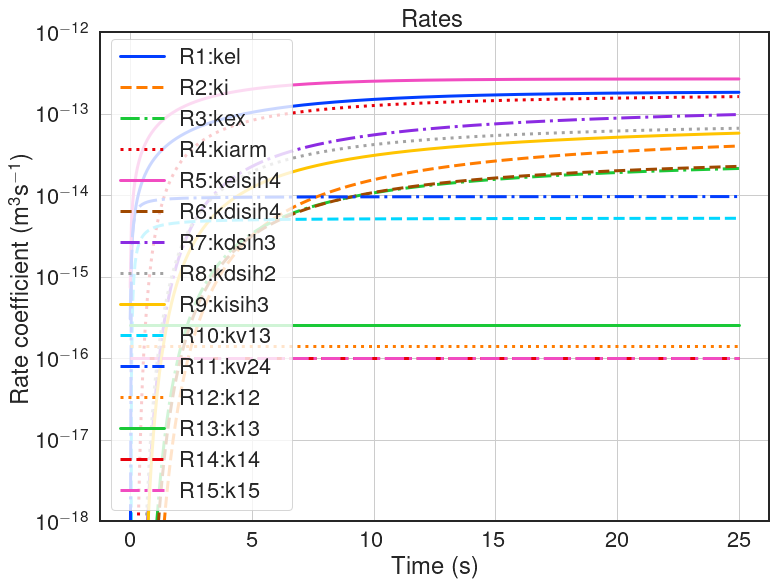

In [10]:
rmap.plot_rates(energy)

In [11]:
plasmasystem = pz.PlasmaSystem(4e-2,
                               6e-2,
                               300.0,
                               300.0,
                               0.1,
                               29.0/30.0,
                               6.6335209e-26,
                               5.3150534e-26,
                               1./const.elementary_charge,
                               1.0)

In [12]:
print(plasmasystem)

System(length=0.04, radius=0.06, temperature=300.0, ion_temperature=300.0, pressure_torr=0.1, arsih4_ratio=0.9666666666666667, armass=6.6335209e-26, sih4mass=5.3150534e-26, power=6.241509125883258e+18, with_tunnel=1.0)


We solve for the species densities and the energy density $\Neps$: 
$$\begin{equation}
 \Ce, \Carp, \Carm , \Csihp{3+}, \Csihp{3}, \Csihp{2}
\end{equation}$$

using the following set of equations for these species:
$$\begin{align}
%\Kel, \Ki, \Kex, \Kiarm, \Kelsihf, \Kdisihf, \Kdsih{3}, \Kdsih{2}, \Kisiht, \Kv{13}, \Kv{24}, \Kn{12}, \Kn{13}
 \dv{\Ne}{t} &= \Ki\Ne\Nar + \Kiarm\Ne\Narm + \Kdisihf\Ne\Nsihp{4} + \Kisiht\Ne\Nsihp{3}-\frac{A}{V}\Gamma_{\Carp}\Narp
 -\frac{A}{V}\Gamma_{\Csihp{3+}}\Nsihp{3+} - \sum_{ik}L^e_{ik}\Ne,\\
 \dv{\Narm}{t} &= \Kex \Nar\Ne - \Kiarm\Ne\Narm -\Kn{12}\Narm\Nsihp{4}-\Kn{13}\Narm\Nsihp{4}
 -\Kn{14}\Narm\Nsihp{3}-\Kn{15}\Narm\Nsihp{2}-\frac{A}{V}\Gamma_{\Carm}\Narm,\\
 \dv{\Csihp{3+}}{t} &= \Kdisihf\Ne\Nsihp{4}-\Kisiht\Ne\Nsihp{3}-\frac{A}{V}\Gamma_{\Csihp{3+}}\Nsihp{3+},\\
 \dv{\Csihp{3}}{t} &= \Kdsih{3}\Ne\Nsihp{4} -\Kisiht\Ne\Nsihp{3} +\Kn{12}\Narm\Nsihp{4}-\Kn{14}\Narm\Nsihp{3}
 -\frac{A}{V}\Gamma_{\Csihp{3}}\Nsihp{3},\\
 \dv{\Csihp{2}}{t} &= \Kdsih{2}\Ne\Nsihp{4} +\Kn{13}\Narm\Nsihp{4}+\Kn{14}\Narm\Nsihp{3}-\Kn{15}\Narm\Nsihp{2}
 -\frac{A}{V}\Gamma_{\Csihp{2}}\Nsihp{2},\\
\end{align}$$
along with the equation for the energy density:
$$\begin{align}
 \dv{\Neps}{t} &= \frac{P}{V} - \Ei\Ki\Nar\Ne - \Eex\Kex\Nar\Ne - \Eiarm\Kiarm\Narm\Ne
 -\frac{5}{3}\frac{A}{V}v_{\text{Bohm},\Carp}\Neps- e V_{\text{sheath}}\frac{A}{V}v_{\text{Bohm},\Carp}\Ne\nonumber\\
 &-3\frac{m_e}{m_{\Car}}\Kel\Neps\Nar -3\frac{m_e}{m_{\Csihp{4}}}\Kelsihf\Neps\Nsihp{4}
 - \Eisiht\Kisiht\Ne\Nsihp{3} - \Edisihf\Kdisihf\Ne\Nsihp{4} - \Edsih{3}\Kdsih{3}\Ne\Nsihp{4}\nonumber\\
 &- \Edsih{2}\Kdsih{2}\Ne\Nsihp{4} - \Ev{13}\Kv{13}\Ne\Nsihp{4}  - \Ev{24}\Kv{24}\Ne\Nsihp{4}
 - \sum_{ik}\Phi_{ik}L^e_{ik}\Ne, 
\end{align}$$
and the quasi-neutrality condition:
$$\begin{equation}
 \Nsihp{3} = \Ne - \Narp + N^Q_\text{NP}.
\end{equation}$$

Here A and V are the area and volume of the reactor, $\Gamma$ is the flux, 
$L^e_{\text{NP}}$ is the loss of electrons to nanoparticles (in $s^{-1}$ see below)
$P$ is the power density,
$\Phi_{ik}$ the surface potential of nanoparticle $i$ with charge $k$ in $eV$, and $N^Q_\text{NP}$
is the net charge on nanoparticles.


In [13]:
pc = pz.PlasmaChem(rates_map, plasmasystem)
sys = pc.get_system()

In [14]:
%%time
sol = solve_ivp(sys, [0, 10e-3], [1.0,1.0,1.0,1.0,1.0,1.0,1.0], method='BDF', dense_output=False)

CPU times: user 128 ms, sys: 226 µs, total: 128 ms
Wall time: 128 ms


In [15]:
xlabel = "Time (s)"
ylabel = r'Density (m$^{-3}$)'
labels = ['e', 'Ar+', 'Ar*', 'SiH3+', 'SiH3', 'SiH2']
densities = [sol.y[0], sol.y[1], sol.y[2], sol.y[3], sol.y[4], sol.y[5]]

In [16]:
np.sum(sol.y[0]-sol.y[1]-sol.y[3])

-324705.6120838639

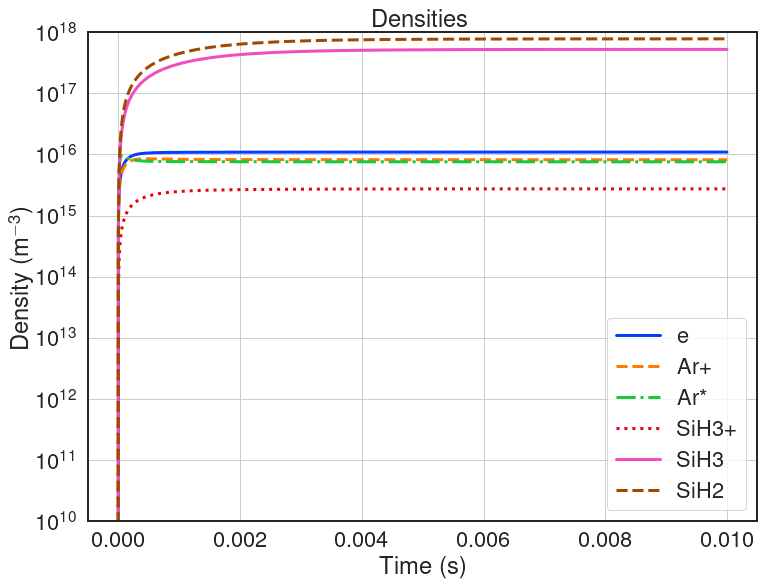

In [17]:
tzr.plot_plain(sol.t, densities, title="Densities",
                       axislabel=[xlabel, ylabel],
                       logx=False, logy=True, labels=labels, ylim=[1e10, 1e18], savename='plasma-densities.eps')

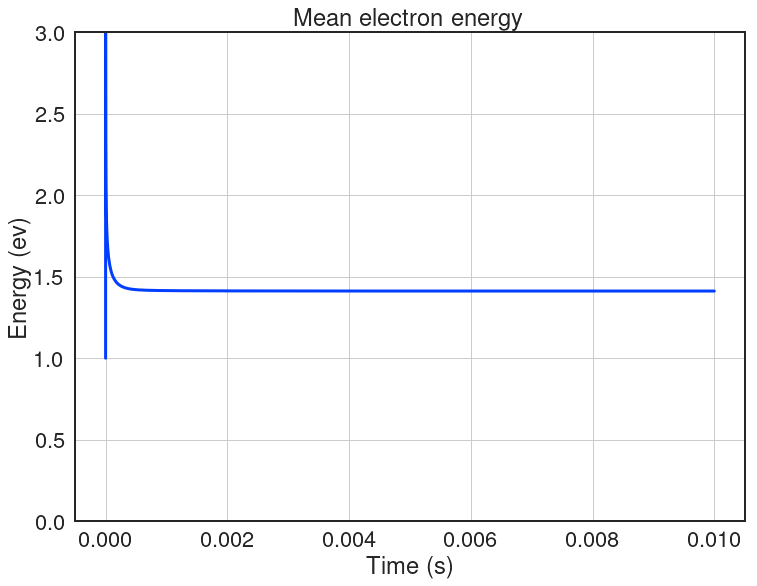

In [18]:
tzr.plot_plain(sol.t, sol.y[-1]/sol.y[0], title="Mean electron energy",
                       axislabel=['Time (s)', 'Energy (ev)'],
                       logx=False, logy=False, labels=labels, ylim=[0, 3], savename='energy.eps')